In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Đọc stopwords từ tệp
with open('C:/Users/Administrator/Downloads/vietnamese-stopwords.txt', "r", encoding='utf-8') as f:
    stop_words = set(f.read().splitlines())

# Đọc dữ liệu từ các tệp Excel
file_names = ['D:/HK5/NLP/UIT-VSMEC-20241212T141641Z-001/UIT-VSMEC/train_nor_811.xlsx',
         'D:/HK5/NLP/UIT-VSMEC-20241212T141641Z-001/UIT-VSMEC/valid_nor_811.xlsx',
         'D:/HK5/NLP/UIT-VSMEC-20241212T141641Z-001/UIT-VSMEC/test_nor_811.xlsx']
dataframes = [pd.read_excel(file) for file in file_names]

# Kết hợp dữ liệu
combined_df = pd.concat(dataframes)

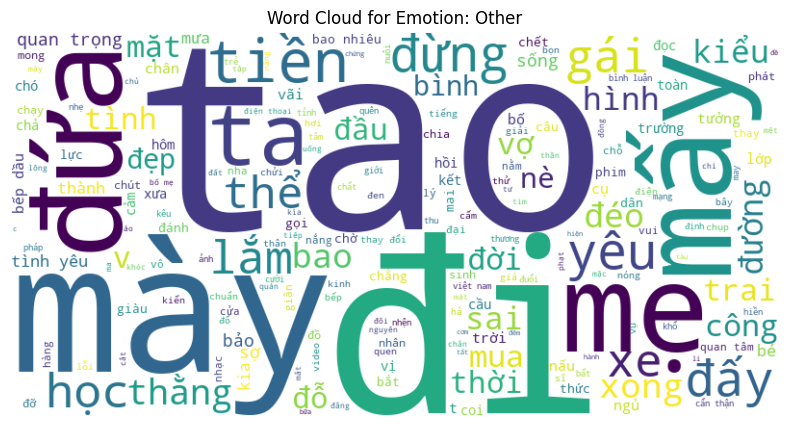

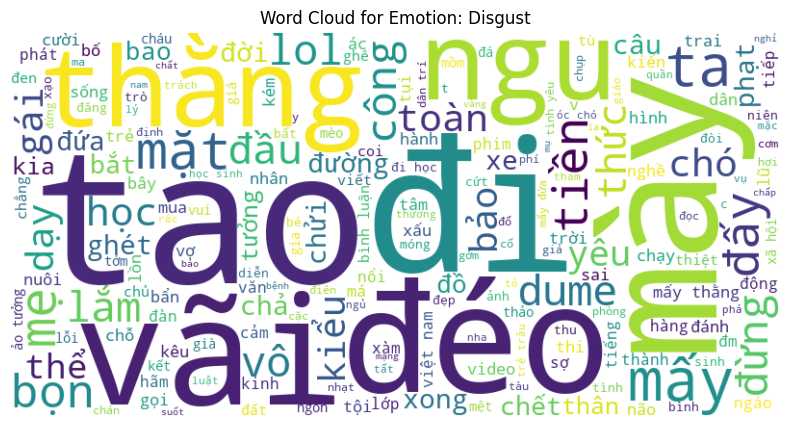

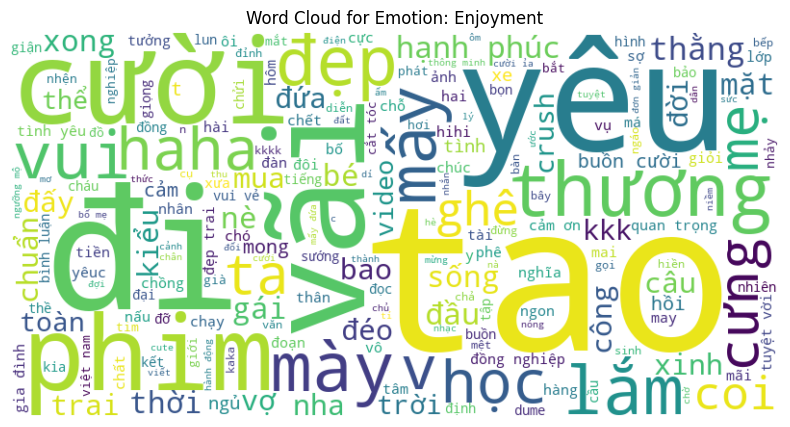

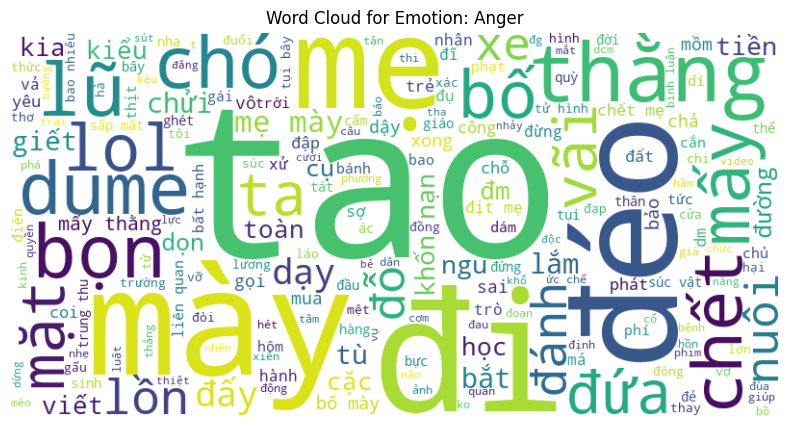

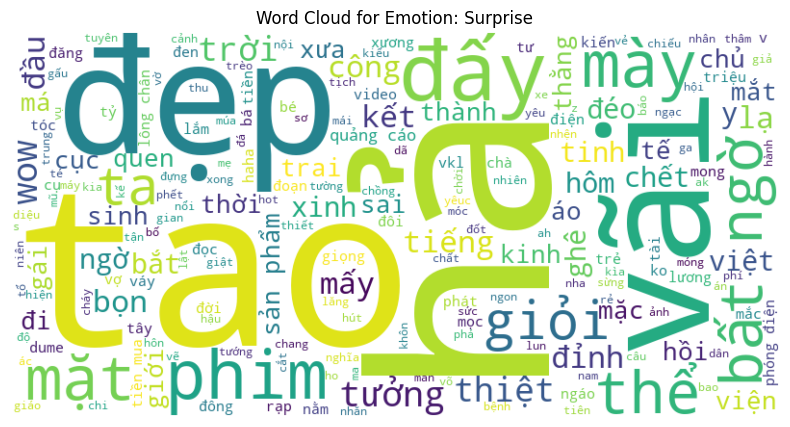

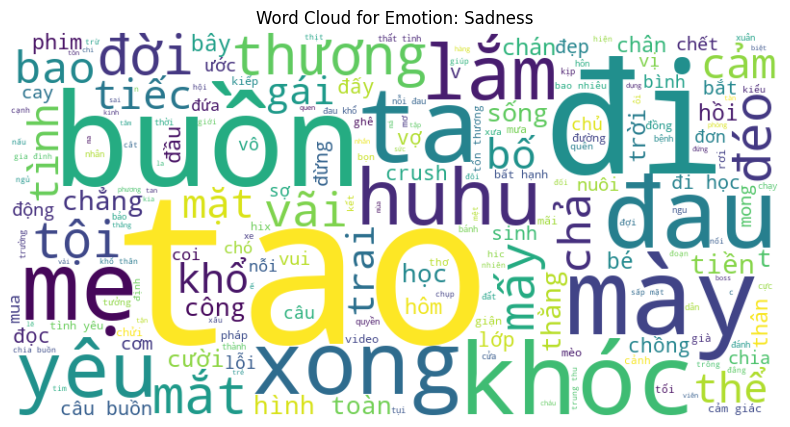

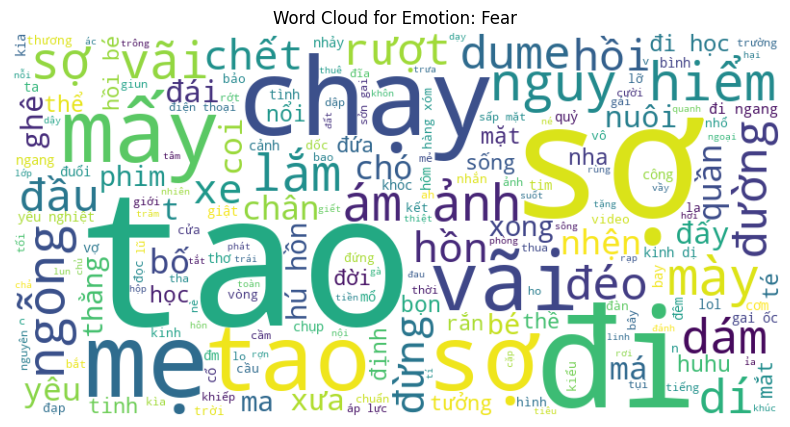

In [20]:
# Tạo wordcloud cho từng Emotion
emotions = combined_df['Emotion'].unique()

for emotion in emotions:
    # Trích xuất câu theo Emotion
    sentences = combined_df[combined_df['Emotion'] == emotion]['Sentence']
    
    # Kết hợp các câu thành một chuỗi
    text = ' '.join(sentences)
    
    # Xóa stopwords
    # filtered_text = ' '.join([word for word in text.split() if word not in stop_words])
    filtered_text = ' '.join([
        word for word in text.split() if word not in stop_words and word != 'per'
    ])

    # Tạo word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

    # Vẽ word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Emotion: {emotion}')
    plt.show()

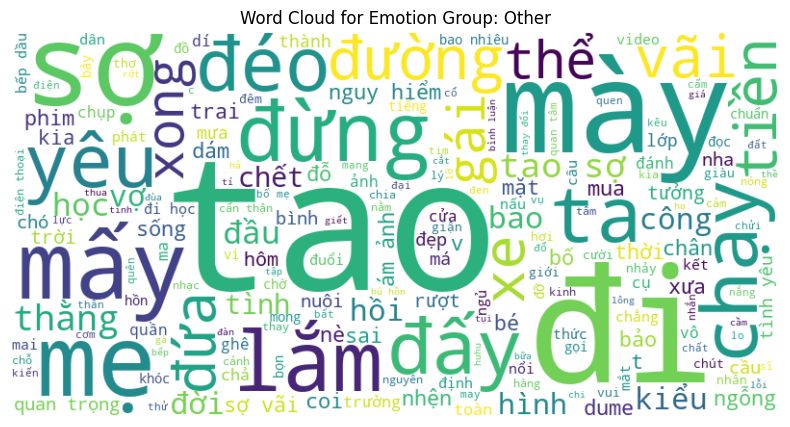

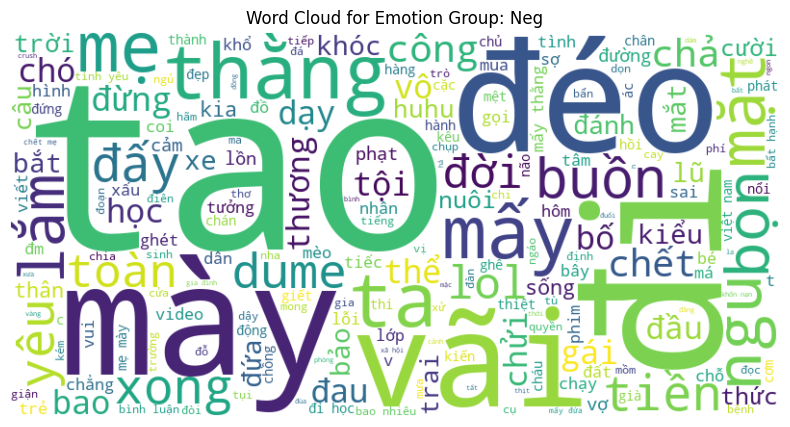

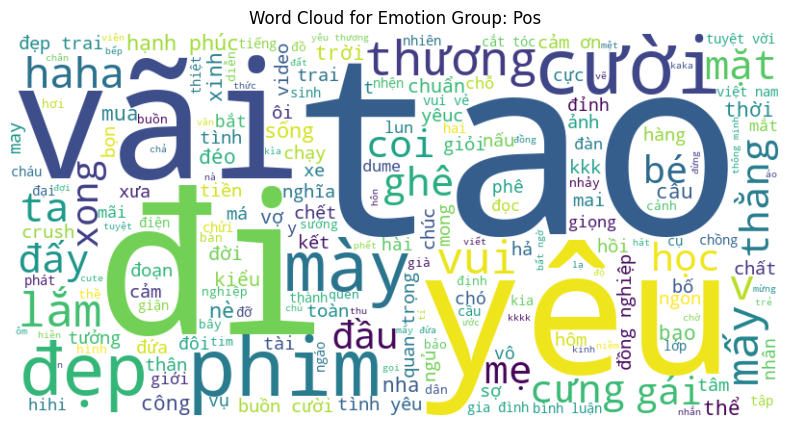

In [21]:

# Định nghĩa các nhóm cảm xúc
emotion_mapping = {
    'Pos': ['Enjoyment', 'Surprise'],
    'Neg': ['Sadness', 'Anger', 'Disgust'],
    'Other': ['Other']  # Thêm các nhãn khác nếu cần
}

# Gom nhóm cảm xúc
combined_df['Emotion_Group'] = combined_df['Emotion'].apply(
    lambda x: next((group for group, emotions in emotion_mapping.items() if x in emotions), 'Other')
)

# Tạo wordcloud cho từng nhóm Emotion
emotion_groups = combined_df['Emotion_Group'].unique()

for group in emotion_groups:
    # Trích xuất câu theo Emotion Group
    sentences = combined_df[combined_df['Emotion_Group'] == group]['Sentence']
    
    # Kết hợp các câu thành một chuỗi
    text = ' '.join(sentences)
    
    # Xóa stopwords và từ "per"
    filtered_text = ' '.join([
        word for word in text.split() if word not in stop_words and word != 'per'
    ])

    # Tạo word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

    # Vẽ word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Emotion Group: {group}')
    plt.show()